# Lab Assignment 1 
### Learning and generalisation in feed-forward networks — from perceptron learning to backprop

### 3. Part I
####  3.1 Classification with a single-layer perceptron
##### 3.1.1 Generation of linearly-separable data

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr

In [80]:
def generateSubsets2(n,scenario,shuffle=1, verbose=1, pattern=1):
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])
    sigma_A = 0.2
    sigma_B = 0.3
    if scenario == 0:
        class_A=np.zeros((2,int(n)))
        class_B=np.zeros((2,int(n)))
        class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
        class_B[0]= np.random.randn(1,int(n))*sigma_B +mu_B[0]
        class_A[1]= np.random.randn(1,int(n))*sigma_A +mu_A[1]
        class_B[1]= np.random.randn(1,int(n))*sigma_B +mu_B[1]     
    #50% each
    if scenario==1:
        class_A=np.zeros((2,int(n/2)))
        class_B=np.zeros((2,int(n/2)))
        class_A[0]= np.concatenate((np.random.randn(1,int(0.25*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.25*n))*sigma_A+mu_A[0]),axis=1)
        class_B[0]= np.random.randn(1,int(0.5*n))*sigma_B +mu_B[0]
        class_A[1]= np.random.randn(1,int(0.5*n))*sigma_A +mu_A[1]
        class_B[1]= np.random.randn(1,int(0.5*n))*sigma_B +mu_B[1]

    #50% of A, 100% of B
    if scenario==2:
        class_A=np.zeros((2,int(n/2)))
        class_B=np.zeros((2,int(n)))
        class_A[0]= np.concatenate((np.random.randn(1,int(0.25*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.25*n))*sigma_A+mu_A[0]),axis=1)
        class_B[0]= np.random.randn(1,n)*sigma_B +mu_B[0]
        class_A[1]= np.random.randn(1,int(0.5*n))*sigma_A +mu_A[1]
        class_B[1]= np.random.randn(1,n)*sigma_B +mu_B[1]

    #50% of B, 100% of A
    if scenario==3:
        class_A=np.zeros((2,int(n)))
        class_B=np.zeros((2,int(n/2)))
        class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
        class_B[0]= np.random.randn(1,int(0.5*n))*sigma_B +mu_B[0]
        class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]
        class_B[1]= np.random.randn(1,int(0.5*n))*sigma_B +mu_B[1]

    #20% 80% and stuff
    if scenario==4:
        class_A=np.zeros((2,int(n)))
        class_B=np.zeros((2,int(n)))
        class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
        class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]

        c_a = np.zeros((2,20))
        c_b = np.zeros((2,80))
        #print(class_A.shape)
        a_i = 0
        b_i = 0
        for i in range(n):
            if class_A[1,i] < 0 and c_a[1,19] == 0:
                c_a[:,a_i] = class_A[:,i]
                a_i+= 1
            elif class_A[1,i] >0 and c_b[1,79] == 0:
                c_b[:,b_i] = class_A[:,i]
                b_i+=1
        class_A = c_a
        class_B = c_b

    if shuffle:
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,patterns.shape[1]))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i]
        targets=targets[i]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)

    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()



    if pattern:
        return patterns, targets
    else:
        return class_A, class_B

In [81]:
def generateSubsets(n,scenario,sigma_A,sigma_B,verbose=0):
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])


    class_A=np.zeros((2,n))
    class_B=np.zeros((2,n))

    class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
    class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]

    class_B[0]= np.random.randn(1,n)*sigma_B +mu_B[0]
    class_B[1]= np.random.randn(1,n)*sigma_B +mu_B[1]

    np.random.shuffle(class_A.T)
    np.random.shuffle(class_B.T)

    if scenario == 0:
        class_A_train=class_A[:,:int(0.5*n)]
        class_B_train=class_B[:,:int(0.5*n)]
        class_A_val=class_A[:,int(0.5*n):]
        class_B_val=class_B[:,int(0.5*n):]

        X=np.concatenate((class_A_train,class_B_train),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.concatenate((np.ones(class_A_train.shape[1]),-np.ones(class_B_train.shape[1])))

        X_val=np.concatenate((class_A_val,class_B_val),axis=1)
        X_val=np.concatenate((X_val,np.ones((1,X_val.shape[1]))))
        T_val=np.ones((X_val.shape[1]))
        T_val[class_A_val.shape[1]:class_B_val.shape[1]] = -1*T_val[class_A_val.shape[1]:class_B_val.shape[1]]

    if scenario == 1:
        class_A_train=class_A[:,:int(0.5*n)]
        class_B_train=class_B
        class_A_val=class_A[:,int(0.5*n):]

        X=np.concatenate((class_A_train,class_B_train),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.concatenate((np.ones(class_A_train.shape[1]),-np.ones(class_B_train.shape[1])))

        X_val=np.concatenate((class_A_val,np.ones((1,class_A_val.shape[1]))))
        T_val=np.ones((X_val.shape[1]))


    if scenario == 2:
        class_A_train=class_A
        class_B_train=class_B[:,:int(0.5*n)]
        class_B_val=class_B[:,int(0.5*n):]

        X=np.concatenate((class_A_train,class_B_train),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.concatenate((np.ones(class_A_train.shape[1]),-np.ones(class_B_train.shape[1])))

        X_val=np.concatenate((class_B_val,np.ones((1,class_B_val.shape[1]))))
        T_val=-np.ones((X_val.shape[1]))

    if scenario == 3:
        mask_neg = class_A[1,:]<0
        mask_pos = class_A[1,:]>0
  
        class_A_train_neg = class_A[:,mask_neg]
        class_A_train_neg = class_A_train_neg[:,:int(0.2*class_A_train_neg.shape[1])]

        class_A_train_pos = class_A[:,mask_pos]
        class_A_train_pos = class_A_train_pos[:,:int(0.8*class_A_train_pos.shape[1])]
        
        X=np.concatenate((class_A_train_neg,class_A_train_pos),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.ones(X.shape[1])

        X_val = class_B
        X_val=np.concatenate((X_val,np.ones((1,X_val.shape[1]))))
        T_val=-np.ones((X_val.shape[1]))

    i = np.arange(X.shape[1])
    np.random.shuffle(i)
    X=X[:,i]
    T=T[i]


    i = np.arange(X_val.shape[1])
    np.random.shuffle(i)
    X_val=X_val[:,i]
    T_val=T_val[i]
    
    if verbose:
        #Plotting classes if desired
        if scenario == 3:
            #print(class_A_train_neg.shape)
            #print(class_A_train_pos.shape)
            plt_train_neg, = plt.plot(class_A_train_neg[0,:],class_A_train_neg[1,:],'g^', label='Class A(1,:)<0')
            plt_train_pos, = plt.plot(class_A_train_pos[0,:],class_A_train_pos[1,:],'bs', label='Class A(1,:)>0')
            plt_val, = plt.plot(class_B[0,:],class_B[1,:],'r*', label='Class B validation')
            plt.legend(handles=[plt_train_neg, plt_train_pos])
            plt.show()
        else:
            plt_train_A, = plt.plot(class_A_train[0,:],class_A_train[1,:],'g^', label='Class A training')
            plt_train_B, = plt.plot(class_B_train[0,:],class_B_train[1,:],'bs', label='Class A training')
            
            if scenario==1:
                plt_val, = plt.plot(class_A_val[0,:],class_A_val[1,:],'r*', label='Class A validation')
            else:
                plt_val, = plt.plot(class_B_val[0,:],class_B_val[1,:],'r*', label='Class B validation')

    return X,T,X_val,T_val

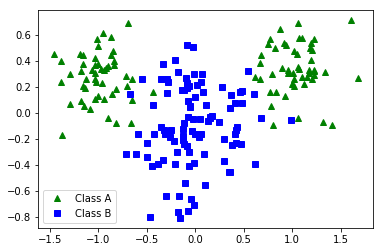

In [82]:
class_A, class_B = generateSubsets2(100,0,shuffle=1,pattern=0)

# 3.1.3 Classification of samples that are not linearly separable

In [83]:
#Randomly initalize weight matrix W
def weights_init(n_dim,n_points,scale):
    W = scale*np.random.randn(n_dim,n_points)
    return W


In [84]:
def error(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((T-Y)**2))

def update_weights_delta_rule(eta,T,W,X):
    H = np.matmul(W,X)
    err = error(T,H)
    dW = -eta*np.matmul(H-T,np.transpose(X))
    return dW, err

def update_weights_perceptron(eta,T,W,X):
    H = np.matmul(W,X)
    Y = np.sign(H)
    err = error(T,Y)
    dW = -eta*np.matmul((Y-T),np.transpose(X))
    #dW = eta*err*X
    return dW, err

def update_weights_delta_rule_sequential(eta,X,T,W):
    weights = 0
    err = []
    for i in range(len(T)):
        #X1_sample = X[0][i]
        #X2_sample = X[1][i]
        #X3_sample = X[2][i]
        X_sample = X[:,i]
        T_sample = T[i]
        
        H = np.matmul(W,X_sample)
        dW = -eta*(H-T_sample)*np.transpose(X_sample)
        #H_s.append(H)
        err.append((H-T_sample)**2)
        
        weights = weights+dW
    #print(weights)
    err = np.mean(err)
    #print(err)
    
    return weights, err

def train_network(eta,X,W,T,epochs,plot=0,sequential=False):
    
    errors = np.zeros((2,epochs))
    W_perceptron = W
    W_delta_rule = W
    #print(W_perceptron)
    #print(W_perceptron[0][2])
    if plot:
        linespace = np.linspace(-2,2,10)
        line_perceptron = get_decisionBound(W_perceptron)
        line_delta_rule = get_decisionBound(W_delta_rule)
        
        plt.subplot(211)
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt_line_perceptron, = plt.plot(linespace,line_perceptron,'k',label='DecisionBoundary')
        plt.legend(handles=[plt_A, plt_B, plt_line_perceptron])
        plt.axis([-2.5,2.5,-2,2])
        plt.title('Perceptron Learning Rule')
        
        plt.subplot(212)
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt_line_delta_rule, = plt.plot(linespace,line_delta_rule,'k',label='DecisionBoundary')
        plt.legend(handles=[plt_A, plt_B, plt_line_delta_rule])
        plt.axis([-2.5,2.5,-2,2])
        plt.title('Delta Learning Rule')
        
        
        
    
    for i in range(epochs):
        
        if sequential:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule_sequential(eta,X,T,W_delta_rule)
        else:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule(eta,T,W_delta_rule,X)
        
        dW_perceptron, err_perceptron = update_weights_perceptron(eta,T,W_perceptron,X)
        
        W_delta_rule = dw_delta_rule + W_delta_rule
        W_perceptron = dW_perceptron + W_perceptron
        #print(W_perceptron)
        
        errors[0,i] = err_perceptron
        errors[1,i] = err_delta_rule
        
        if plot:
            line_perceptron = get_decisionBound(W_perceptron)
            line_delta_rule = get_decisionBound(W_delta_rule)
    
            #plt_line_perceptron.set_ydata(line_perceptron)
            #plt_line_delta_rule.set_ydata(line_delta_rule)
            
            #plt.ion()
            #plt.draw()
            #plt_line_perceptron.remove()
            #plt_line_delta_rule.remove()
            
            plt.subplot(211)
            plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
            plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
            plt_line_perceptron, = plt.plot(linespace,line_perceptron,'k',label='DecisionBoundary')
            plt.legend(handles=[plt_A, plt_B, plt_line_perceptron])
            plt.axis([-2.5,2.5,-2,2])
            plt.title('Perceptron Learning Rule')
        
            plt.subplot(212)
            plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
            plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
            plt_line_delta_rule, = plt.plot(linespace,line_delta_rule,'k',label='DecisionBoundary')
            plt.legend(handles=[plt_A, plt_B, plt_line_delta_rule])
            plt.axis([-2.5,2.5,-2,2])
            plt.title('Delta Learning Rule')
            
            plt.show()
            plt.pause(0.1)
    
            #print(linespace.shape,line.shape)
    
        
    
    #plt.show()
            
    return W_perceptron, W_delta_rule, errors


In [85]:
def get_decisionBound(w):
    #print(w.shape)
    slope_vec = np.array([w[0][1],-w[0][0]])
    slope = slope_vec[1]/slope_vec[0]
    intercept = w[0][2]/np.linalg.norm(w)
    
    linespace = np.linspace(-2,2,10)
    line = slope*linespace + intercept
    y=(-1/(w[0][1]))*(w[0][0]*line+(w[0][2]))
    return y

In [86]:
def predict(validation,W, classification = True):
        #print(validation)
        prediction = H = np.matmul(W,validation)
        if classification:
            for p in range(prediction.shape[1]):
                if prediction[0,p] >0:
                    prediction[0,p] = 1
                else:
                    prediction[0,p] = -1
            
        return prediction

In [87]:
def plot_decision_boundary(X,T, W, h = 0.1):
        x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
        y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        
        grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
        print(yy.shape)
        ones = np.ones((1,grid_data.shape[1]))
        grid_data = np.vstack((grid_data,ones))
        print("decision")
        print(grid_data.shape)
        print(ones.shape)
        print(W.shape)
        
        Z = predict(grid_data,W, True)
        #print(Z)
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
        plt.scatter(X[0, :], X[1, :],c= T, cmap=clr.ListedColormap(['blue','green']))
        plt.show()

W
[[-0.03405617  1.19163396 -0.13123518]]
(35, 50)
decision
(3, 1750)
(1, 1750)
(1, 3)


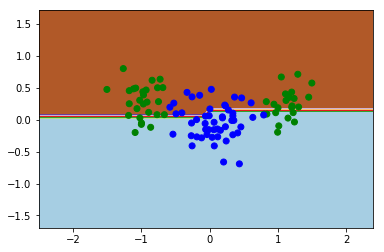

(35, 50)
decision
(3, 1750)
(1, 1750)
(1, 3)


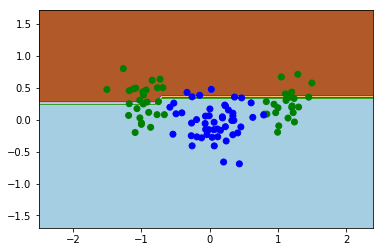

In [88]:
#Perceptron and Delta learning rule
n = 100
eta = 1e-4
epochs = 1000
n_outputs = 1
n_dim = 3
scale = 1
sigma_A = 0.2
sigma_B = 0.3
X, T,X_val,T_val = generateSubsets(n,0,sigma_A,sigma_B)
W = weights_init(n_outputs,n_dim,scale)

W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
print("W")
print(W_delta_rule)
plot_decision_boundary(X,T,W_delta_rule)
plot_decision_boundary(X,T,W_perceptron)


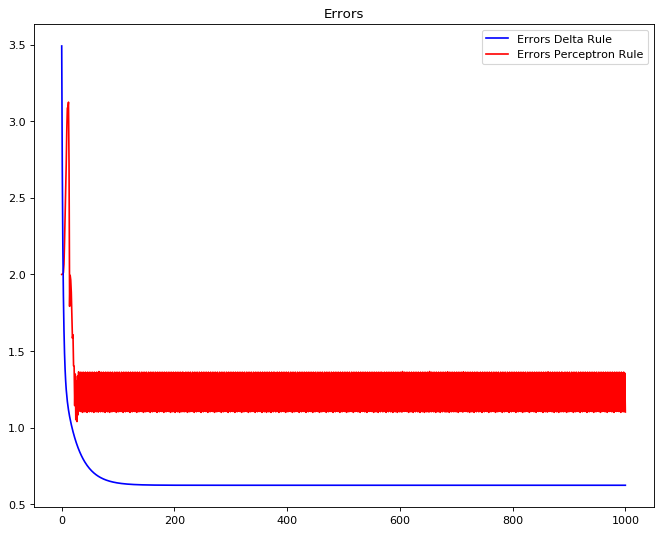

In [58]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

#print(errors)

# REMOVE 50% of each!


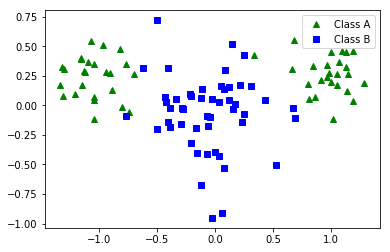

(37, 47)
decision
(3, 1739)
(1, 1739)
(1, 3)


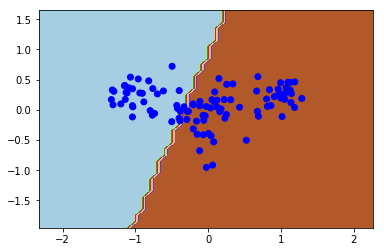

(37, 47)
decision
(3, 1739)
(1, 1739)
(1, 3)


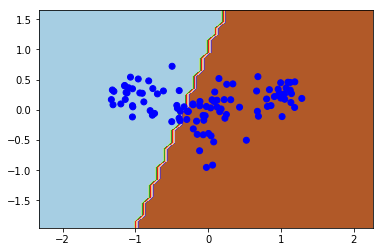

In [61]:
eta = 1e-4
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1
n = 100
X, T = generateSubsets(n,1,pattern=1)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
plot_decision_boundary(X,T,W_delta_rule)
plot_decision_boundary(X,T,W_perceptron)

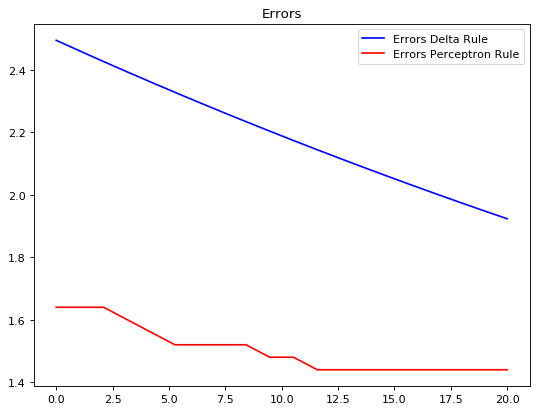

In [62]:
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

# Use 50% of A but all B:

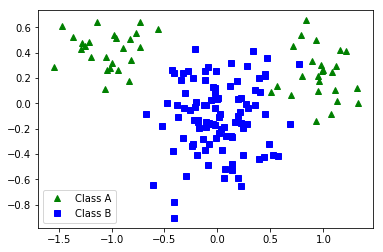

In [27]:
class_A, class_B = generateSubsets(100,2,shuffle=1,pattern=0)

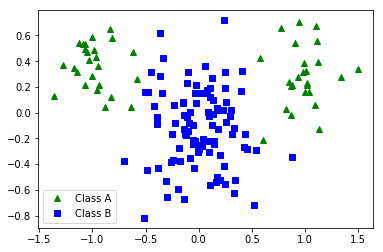

(36, 49)
decision
(3, 1764)
(1, 1764)
(1, 3)


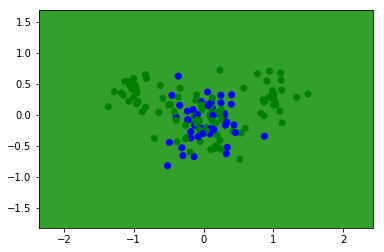

(36, 49)
decision
(3, 1764)
(1, 1764)
(1, 3)


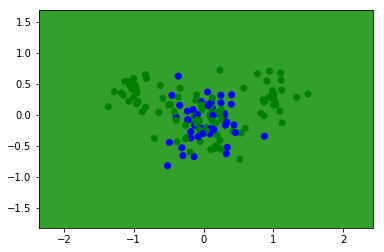

In [63]:
eta = 1e-4
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1
n = 100
X, T = generateSubsets(n,2,pattern=1)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
plot_decision_boundary(X,T,W_delta_rule)
plot_decision_boundary(X,T,W_perceptron)

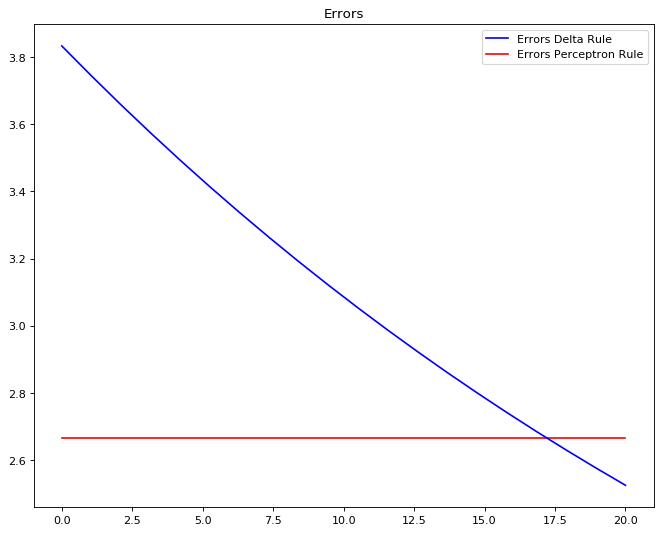

In [64]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

# 50% of B but 100% of A

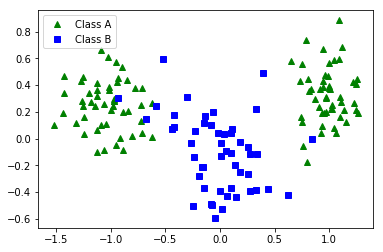

(35, 48)
decision
(3, 1680)
(1, 1680)
(1, 3)


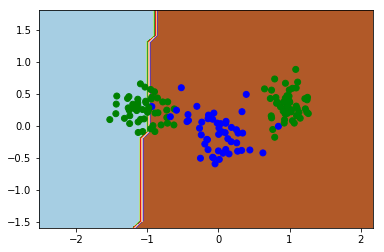

(35, 48)
decision
(3, 1680)
(1, 1680)
(1, 3)


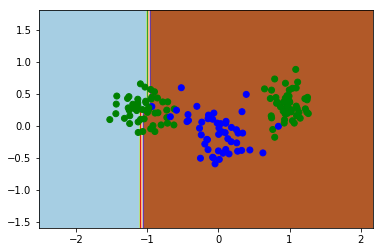

In [65]:
eta = 1e-4
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1
n = 100
X, T = generateSubsets(n,3,pattern=1)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
plot_decision_boundary(X,T,W_delta_rule)
plot_decision_boundary(X,T,W_perceptron)

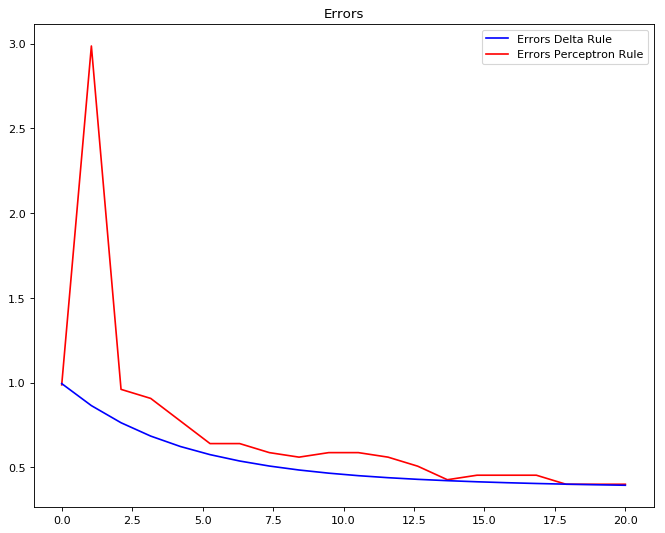

In [40]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

# 20% from A where class_A(1,:) < 0 and 80% from class_A(1,:)>0

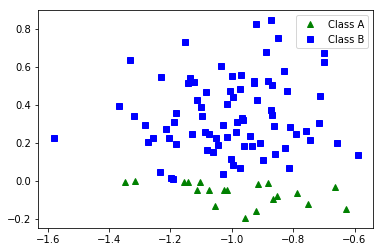

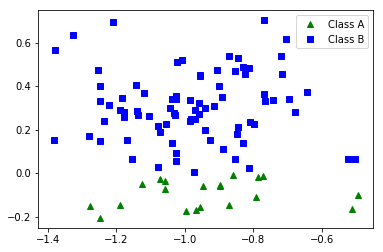

[[4.         4.         4.         4.         4.         4.
  4.         4.         4.         4.         4.         4.
  4.         4.         4.         4.         4.         4.
  4.         4.        ]
 [9.61326003 9.23042059 8.86285345 8.50994935 8.17112333 7.84581377
  7.53348145 7.23360868 6.94569839 6.66927337 6.40387544 6.14906467
  5.90441873 5.6695321  5.44401544 5.22749497 5.0196118  4.82002134
  4.62839279 4.44440852]]
(30, 29)
decision
(3, 870)
(1, 870)
(1, 3)


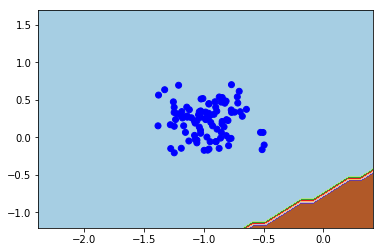

(30, 29)
decision
(3, 870)
(1, 870)
(1, 3)


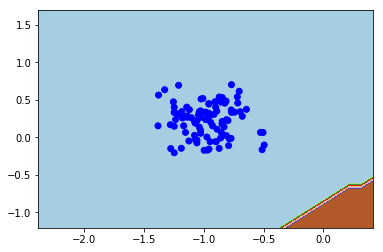

In [67]:
eta = 1e-4
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1
n = 1000
class_A, class_B = generateSubsets(n,4,shuffle=1,pattern=0)
X, T = generateSubsets(n,4,pattern=1)
#print(X)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
print(errors)
plot_decision_boundary(X,T,W_delta_rule)
plot_decision_boundary(X,T,W_perceptron)

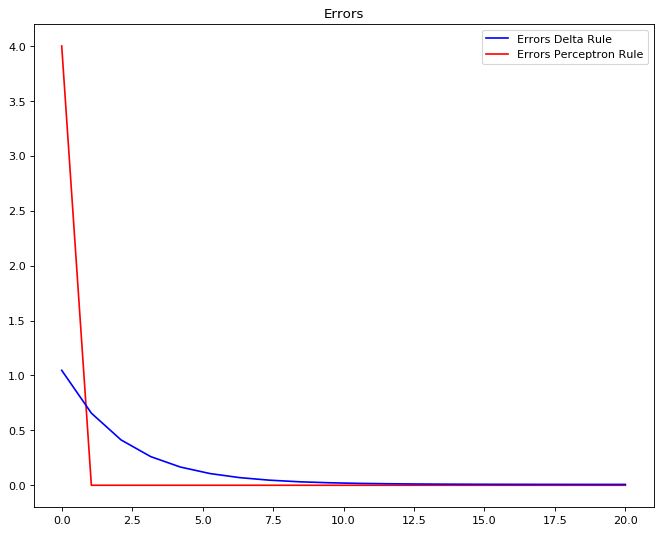

In [33]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()